# Olist Brazilian E-commerce Sales Analysis

- This project analyzes customer orders, payments, and shipping from a Brazilian e-commerce company to uncover sales patterns, delays, and customer trends.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
orders = pd.read_csv('olist_order_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

In [3]:
orders.shape

(99441, 8)

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])


In [8]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [10]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
#dropping missing values of orders dataset

orders = orders.dropna(axis=1)


In [12]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00


# EDA

## 1. Monthly Order Trends

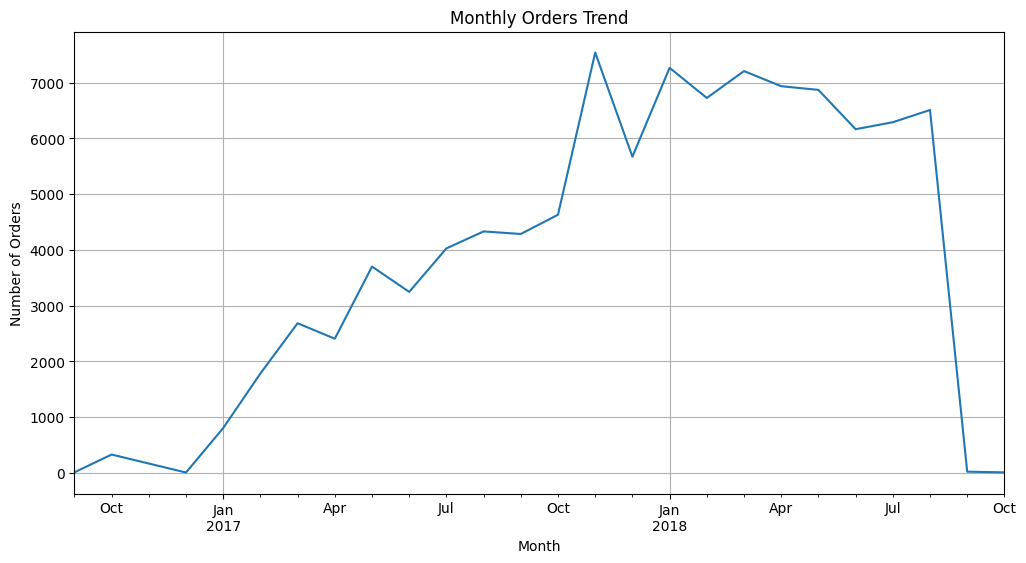

In [13]:
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders['month'].value_counts().sort_index()
monthly_orders.plot(kind='line', figsize=(12,6), title='Monthly Orders Trend')
plt.xlabel('Month'); plt.ylabel('Number of Orders'); plt.grid(True)
plt.show()

## 2. Top customers states

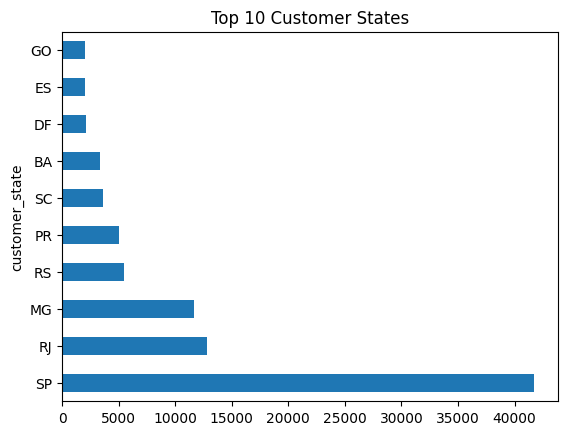

In [14]:
orders_customers = orders.merge(customers, on='customer_id')
top_states = orders_customers['customer_state'].value_counts().head(10)
top_states.plot(kind='barh', title='Top 10 Customer States')
plt.show()

## Payment method used

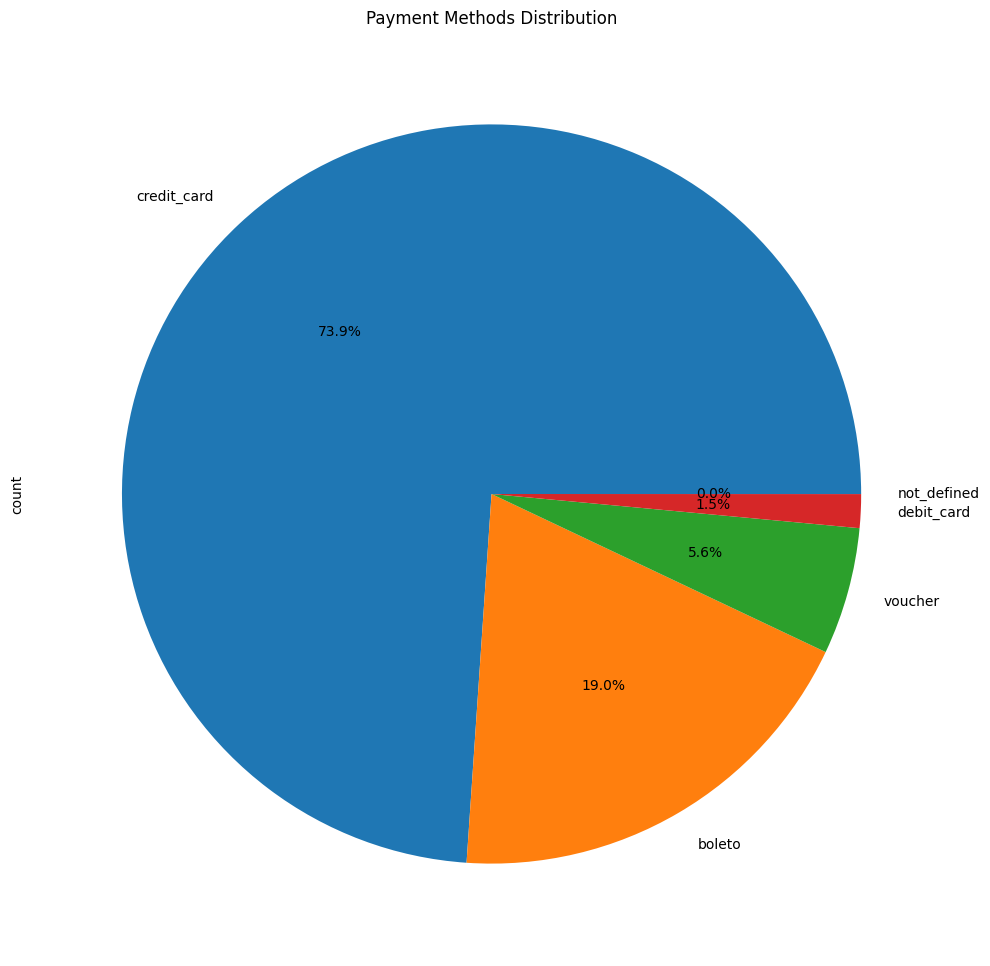

In [15]:
plt.figure(figsize=(12,12))
payments['payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Payment Methods Distribution')
plt.show()

## Orders by Day of the Week

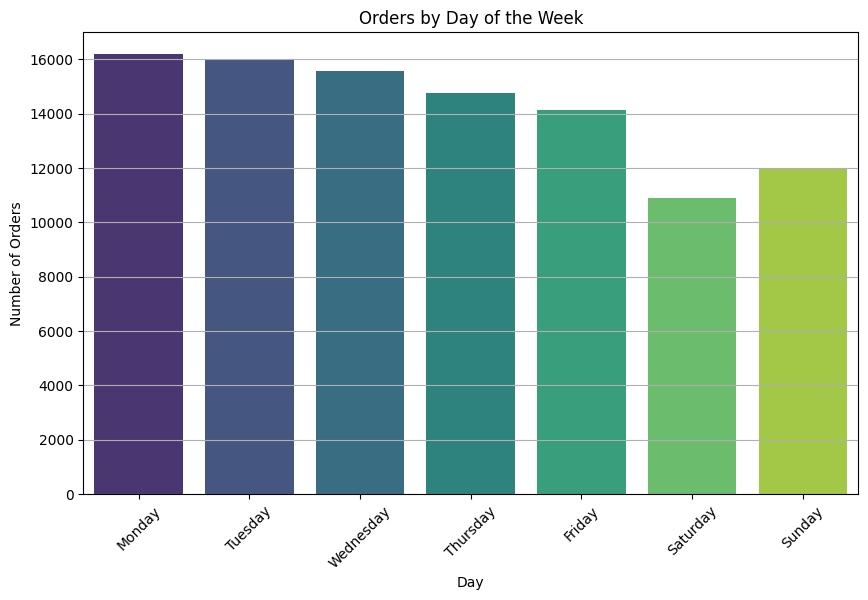

In [16]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders['day_of_week'] = orders['order_purchase_timestamp'].dt.day_name()

day_df = orders['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

day_df.columns = ['day', 'orders']

plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='day', y='orders', hue='day', palette='viridis', dodge=False)

plt.title("Orders by Day of the Week")
plt.ylabel("Number of Orders")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



## Delivery time analysis

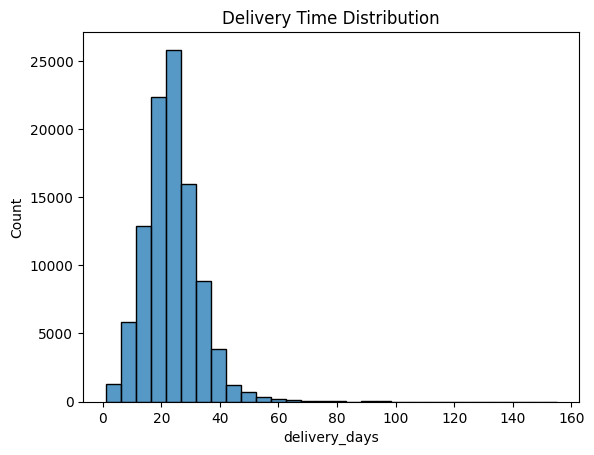

In [17]:
plt.title('Delivery Time Distribution')

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

orders = orders.dropna(subset=['order_estimated_delivery_date'])

orders['delivery_days'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']).dt.days
sns.histplot(orders['delivery_days'], bins=30)

plt.show()

# Insights

- Credit card is the most preferred payment method (~75%)
- Majority of customers are from SP, RJ, MG regions
- Delivery takes on average 12–15 days; some delayed by over 40 days
- Sales peaked around Nov 2017, showing a seasonal pattern

# Conclusion

This analysis helps Olist identify regional performance, optimize delivery logistics, and streamline payment processing. Future work could focus on product-level profit trends.
